These first commands are only to import the modules that we are going to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Now let's generate a synthetic dataset

In [2]:
features, true_labels = make_blobs(
    n_samples=500, #500 2D datapoints
    centers=10, #10 isotropic Gaussian distributions
    cluster_std=1.75,
    n_features=2
)

Let's standardize

In [3]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

now time for clustering (kmeans)

In [6]:
def kmeans_scatter(cluster):
    """Performs Kmeans algorithm on the number of clusters assigned (number of clusters must be a single integer).

       Plots the results of the Kmeans algorithm as a 2D scatter plot.
    """ 
    kmeans = KMeans(
        init="random",
        n_clusters=cluster,
        n_init=10,
        max_iter=300
    )
    #sets up arguments for the kmeans algorithm 
    #init="random" -> choose clusters at random for initial centroid
    #n_init runs kmeans with 10 different centroid seeds
    #up to 300 iterations

    kmeans.fit(scaled_features)
    yaxis_kmeans = kmeans.predict(scaled_features)
    #performs kmeans on the scaled dataset initially created with make_blobs

    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=yaxis_kmeans, cmap='viridis')
    plt.title(f"KMeans Clustering for K={cluster}")
    return plt.show()



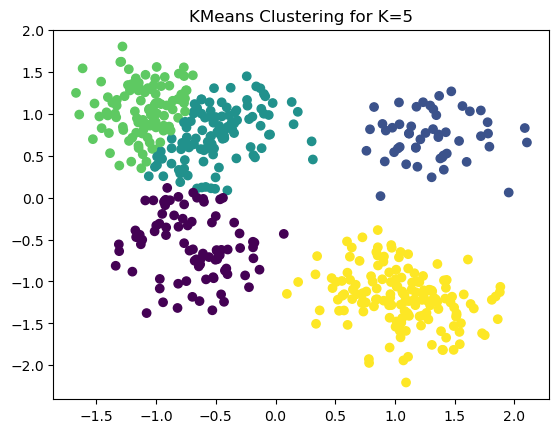

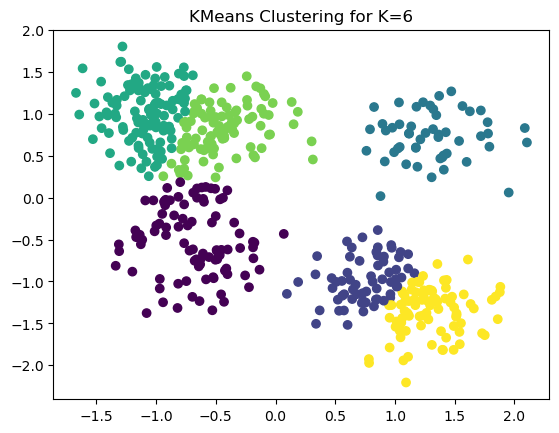

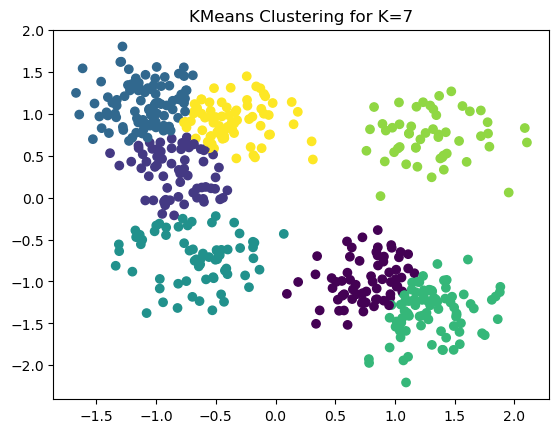

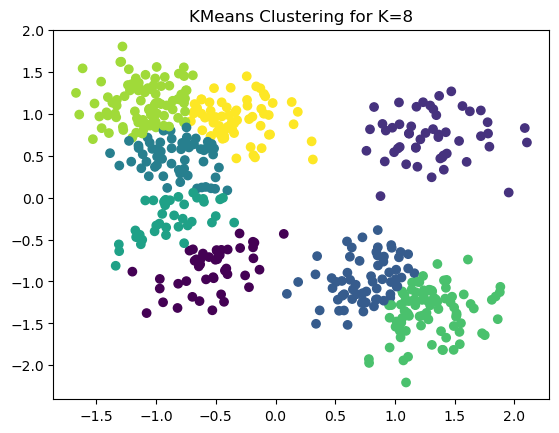

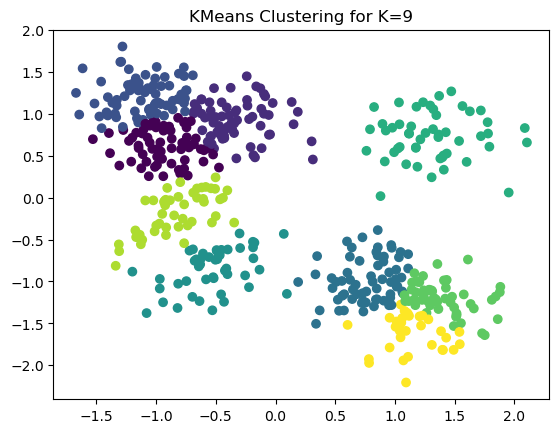

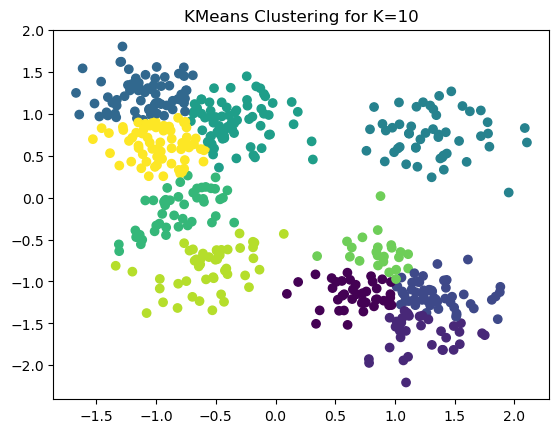

In [9]:
for i in range(5,11):
    kmeans_scatter(i)

Now let's explore the sum of the squared errors as a function of the number of clusters

In [10]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [11]:
number_clusters = [5,6,7,8,9,10]
sse = []
for k in number_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Now let's plot the SSE

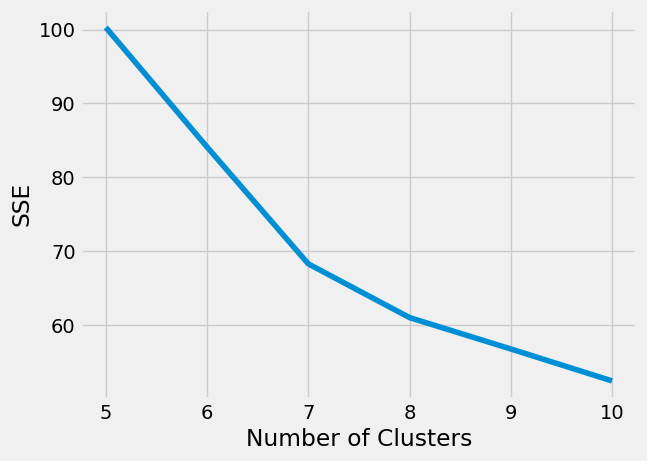

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(number_clusters, sse)
plt.xticks(number_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()